<a href="https://colab.research.google.com/github/Jaweria-Asif/Automated-News-Categorization-Using-Data-Science-Techniques/blob/main/Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Project Title**
"Automated News Categorization and Analysis Using Machine Learning"

**Problem Statement**
With the exponential growth of online news content, manually categorizing and analyzing news articles is time-consuming and inefficient. Dawn's website publishes a variety of news articles daily, making it challenging for users to access information organized by their interests or categories. This project aims to automate the process of categorizing news articles into predefined categories using machine learning models and web scraping techniques. The proposed solution will provide accurate and organized news data, enhancing user experience and enabling efficient data analysis for trends and insights.

**Business Questions**

1- How can we efficiently scrape the latest news articles from Dawn's website and organize them into structured data?

2- What are the most effective keywords and techniques for accurately classifying news articles into predefined categories?

3- Which machine learning models (e.g., Decision Tree, Logistic Regression, Random Forest) perform best for text classification in this context?

4- How does combining model predictions using a voting classifier improve classification accuracy?

5- What trends or patterns can be observed in the categorized news articles over time?
How can this categorized data be used to improve user experience or provide actionable insights for businesses or policymakers?

In [1]:
import csv
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
import re
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from string import punctuation
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Define keywords for classification
CATEGORY_KEYWORDS = {
    "political": ["election", "government", "politics", "minister", "policy", "parliament", "vote", "protest", "strikes", "march"],
    "sports": ["match", "tournament", "goal", "cricket", "football", "player", "team"],
    "country": ["Bangladesh", "Pakistan", "India", "China", "Phalestine", "Iran", "America", "England"],
    "business": ["stock", "market", "business", "company", "trade", "corporate", "investment", "liabilities"],
    "economic": ["economy", "inflation", "GDP", "growth", "finance", "budget"],
    "junk science": ["conspiracy", "fake science", "hoax", "pseudoscience", "myth", "debunked"],
    "technology": ["technology", "AI", "artificial intelligence", "software", "gadgets", "innovation", "cybersecurity"],
    "health": ["health", "medicine", "disease", "COVID", "vaccine", "hospital", "mental health"],
    "entertainment": ["movie", "film", "celebrity", "music", "concert", "award", "Netflix"],
    "environment": ["climate", "environment", "global warming", "pollution", "wildlife"],
    "science": ["research", "discovery", "space", "astronomy", "biology", "physics", "chemistry"],
    "education": ["education", "school", "university", "student", "teacher", "admissions", "exam"],
    "crime": ["crime", "murder", "robbery", "fraud", "scam", "arrest", "police"],
    "travel": ["travel", "tourism", "flight", "destination", "vacation", "hotel"],
    "lifestyle": ["lifestyle", "fashion", "food", "recipe", "fitness", "beauty", "trend"],
    "international": ["international", "global", "foreign", "UN", "world", "abroad"],
    "history": ["history", "ancient", "civilization", "war", "revolution", "archaeology", "historical figures"],
    "art & culture": ["art", "painting", "museum", "exhibition", "artist", "sculpture", "culture", "heritage"],
    "law": ["law", "court", "judge", "lawyer", "rights", "constitution", "legislation"],
    "social issues": ["equality", "human rights", "discrimination", "poverty", "justice", "freedom", "activism"],
    "technology & innovation": ["robotics", "automation", "IoT", "blockchain", "5G", "cloud computing", "virtual reality"],
    "food & drink": ["food", "recipe", "cuisine", "restaurant", "dish", "beverage", "nutrition"],
    "parenting & family": ["parenting", "children", "family", "home", "baby", "education", "family life"],
    "transportation": ["transport", "cars", "bikes", "public transport", "traffic", "infrastructure", "commute"],
    "finance": ["investment", "banking", "loans", "credit", "mortgage", "savings", "stock market"],
    "pets & animals": ["pets", "dogs", "cats", "wildlife", "animals", "veterinary", "zoo"],
    "philosophy": ["philosophy", "ethics", "metaphysics", "logic", "thought", "reason", "debate"],
    "weather": ["weather", "forecast", "temperature", "storm", "rain", "snow", "climate change"],
    "automotive": ["cars", "motorcycles", "electric vehicles", "autonomous vehicles", "engine", "car reviews"],
    "music": ["music", "song", "album", "artist", "band", "concert", "soundtrack"],
    "gaming": ["gaming", "video games", "gamer", "console", "e-sports", "streaming", "game review"],
    "literature": ["books", "reading", "author", "novel", "poetry", "literary awards", "book club"],
    "real estate": ["real estate", "property", "housing", "apartment", "mortgage", "landlord", "rental"],
    "religion": ["religion", "faith", "church", "temple", "holy", "spirituality", "belief"],
    "events": ["event", "festival", "conference", "exhibition", "celebration", "concert", "meeting"],
    "technology & gadgets": ["smartphones", "laptops", "gadgets", "wearables", "computers", "AI devices", "electronics"],
    "personal finance": ["budgeting", "savings", "loans", "debt", "retirement", "taxes", "credit scores"],
    "mental health": ["anxiety", "depression", "therapy", "stress", "mindfulness", "well-being", "counseling"],
    "social media": ["social media", "Instagram", "Twitter", "Facebook", "TikTok", "content creation", "influencer"],
    "nonprofit & charity": ["charity", "volunteering", "donation", "NGO", "philanthropy", "social good"],
    "startups & entrepreneurship": ["startup", "entrepreneur", "business plan", "venture capital", "innovation", "founder"],
    "music & performing arts": ["classical music", "jazz", "dance", "theater", "opera", "ballet", "musical"],
    "luxury & fashion": ["luxury", "designer", "high fashion", "couture", "jewelry", "accessories", "fashion trends"],
    "education & learning": ["online courses", "e-learning", "training", "skills development", "certifications", "study tips"],
    "cryptocurrency": ["bitcoin", "blockchain", "cryptocurrency", "ethereum", "NFT", "mining", "decentralized"],
    "podcasts": ["podcast", "audio", "interviews", "talk shows", "discussion", "podcast episodes", "show"],
    "space & astronomy": ["space exploration", "NASA", "planets", "black holes", "telescopes", "astronomical discoveries"],
    "luxury lifestyle": ["luxury homes", "private jets", "yachts", "luxury cars", "high-end lifestyle", "exclusive events"],
    "DIY & crafts": ["DIY", "crafts", "handmade", "home decor", "sewing", "knitting", "upcycling"],
    "virtual & augmented reality": ["VR", "AR", "augmented reality", "virtual reality games", "immersive technology"],
    "shopping & retail": ["shopping", "e-commerce", "sales", "retail", "discounts", "online shopping", "store reviews"],
    "food culture": ["gourmet", "ethnic cuisine", "street food", "food trends", "recipe sharing", "food culture"],
    "humanitarian aid": ["humanitarian", "disaster relief", "aid", "refugees", "crisis", "aid organizations"],
    "sustainability": ["sustainability", "eco-friendly", "green energy", "renewable", "sustainable practices", "green products"],
    "collectibles & antiques": ["collectibles", "antiques", "vintage", "rare items", "collector's items", "auction", "heritage"]
}

# Example of how to access the keywords for a specific category
print(CATEGORY_KEYWORDS["sports"])


['match', 'tournament', 'goal', 'cricket', 'football', 'player', 'team']


In [ ]:
# Function to classify categories based on keywords
def classify_category(title, summary):
    content = f"{title} {summary}".lower()
    for category, keywords in CATEGORY_KEYWORDS.items():
        if any(keyword in content for keyword in keywords):
            return category
    return "other"  # Default category if no keywords match

In [ ]:
# Function to scrape news from Dawn News
def scrape_dawn_news():
    url = "https://www.dawn.com/latest-news"  # Dawn's latest news page
    response = requests.get(url)
    if response.status_code != 200:
        print("Failed to retrieve the page. Status code:", response.status_code)
        return []

    soup = BeautifulSoup(response.content, 'html.parser')

    # Finding all news articles
    articles = soup.find_all('article', class_='story')
    news_list = []

    for article in articles:
        try:
            title = article.find('h2', class_='story__title').text.strip()
            link = article.find('a')['href']
            summary = article.find('div', class_='story__excerpt').text.strip() if article.find('div', class_='story__excerpt') else ""

            # Determine category
            category = classify_category(title, summary)

            news_list.append({
                'title': title,
                'link': link,
                'summary': summary,
                'category': category
            })
        except AttributeError:
            continue

    return news_list

In [ ]:
# Function to save news data to a CSV file
def save_to_csv(news_list, filename="dawn_news.csv"):
    headers = ['Title', 'Summary', 'Link', 'Category']

    with open(filename, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=headers)
        writer.writeheader()

        for news in news_list:
            writer.writerow({
                'Title': news['title'],
                'Summary': news['summary'],
                'Link': news['link'],
                'Category': news['category']
            })

    print(f"Data saved to {filename}")


In [ ]:
# Main Function
if __name__ == "__main__":
    print("Scraping news from Dawn...")
    news_list = scrape_dawn_news()

    if not news_list:
        print("No news articles found!")
    else:
        print(f"Found {len(news_list)} articles. Classifying them...")

        # Save to CSV
        save_to_csv(news_list)

        # Display the data
        for idx, news in enumerate(news_list, start=1):
            print(f"\nNews #{idx}")
            print(f"Title: {news['title']}")
            print(f"Summary: {news['summary']}")
            print(f"Link: {news['link']}")
            print(f"Category: {news['category']}")

Scraping news from Dawn...
Found 227 articles. Classifying them...
Data saved to dawn_news.csv

News #1
Title: Musk’s AI startup raises further $6bn
Summary: Company now one of world’s most valuable startups with an estimated $50bn valuation.
Link: https://www.dawn.com/news/1880792/musks-ai-startup-raises-further-6bn
Category: business

News #2
Title: ICC announces official fixtures for Champions Trophy 2025
Summary: Pak-India clash set for Feb 23; Pakistan to take on New Zealand in Group A tournament opener in Karachi on Feb 19.
Link: https://www.dawn.com/news/1880793/icc-announces-official-fixtures-for-champions-trophy-2025
Category: sports

News #3
Title: PTA announces ‘significant strides in enhancing connectivity’ through new submarine cable system
Summary: Says first phase of cable installation commenced on December 1, second phase to begin on April 1, 2025.
Link: https://www.dawn.com/news/1880781/pta-announces-significant-strides-in-enhancing-connectivity-through-new-submarine-c

In [ ]:
# Load the dataset
data = pd.read_csv("dawn_news.csv")

<ipython-input-8-6128a1b4b397>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


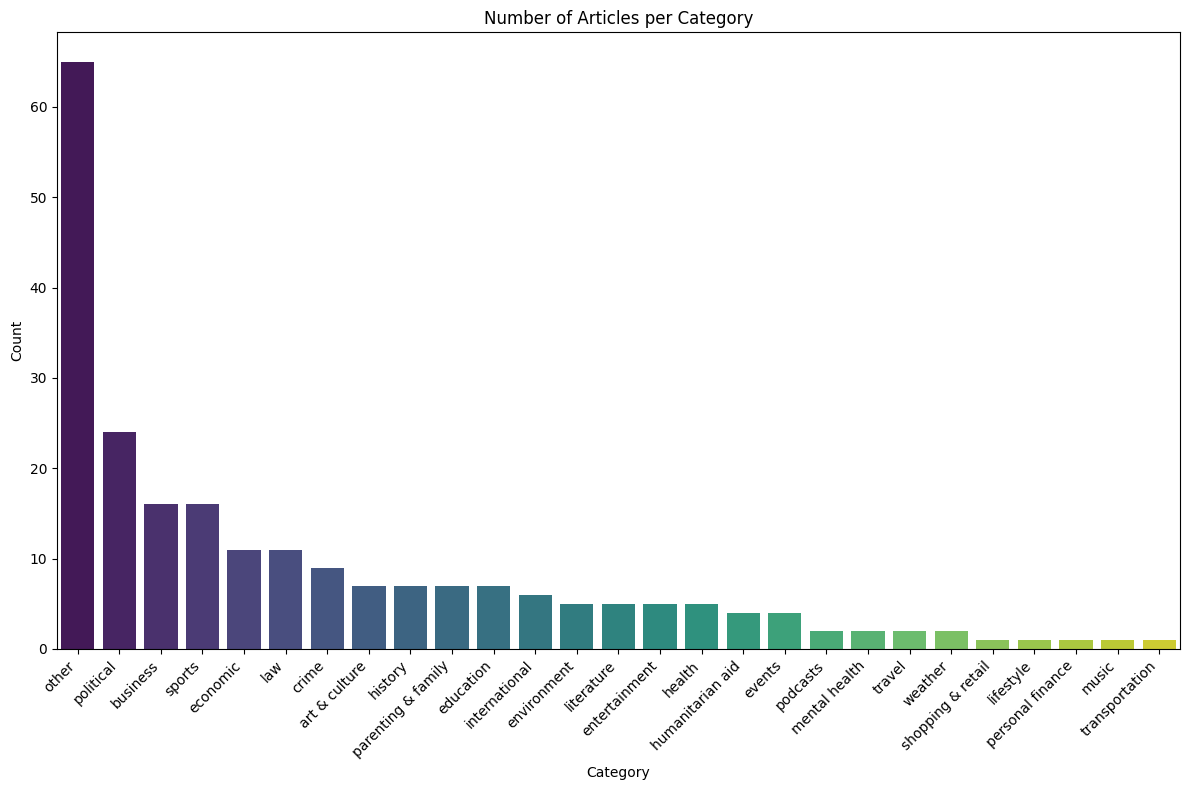

In [ ]:
# Visualize Category Distribution
# Calculate the counts of each category
category_counts = data['Category'].value_counts()

plt.figure(figsize=(12, 8))  # Increase figure size for better spacing
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.title("Number of Articles per Category")
plt.xticks(rotation=45, ha='right')  # Rotate and align text to the right for better readability
plt.xlabel("Category")
plt.ylabel("Count")
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()


<ipython-input-10-fdfc91ef8f55>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data['Category'], kde=False, bins=len(data['Category'].unique()), palette="viridis")


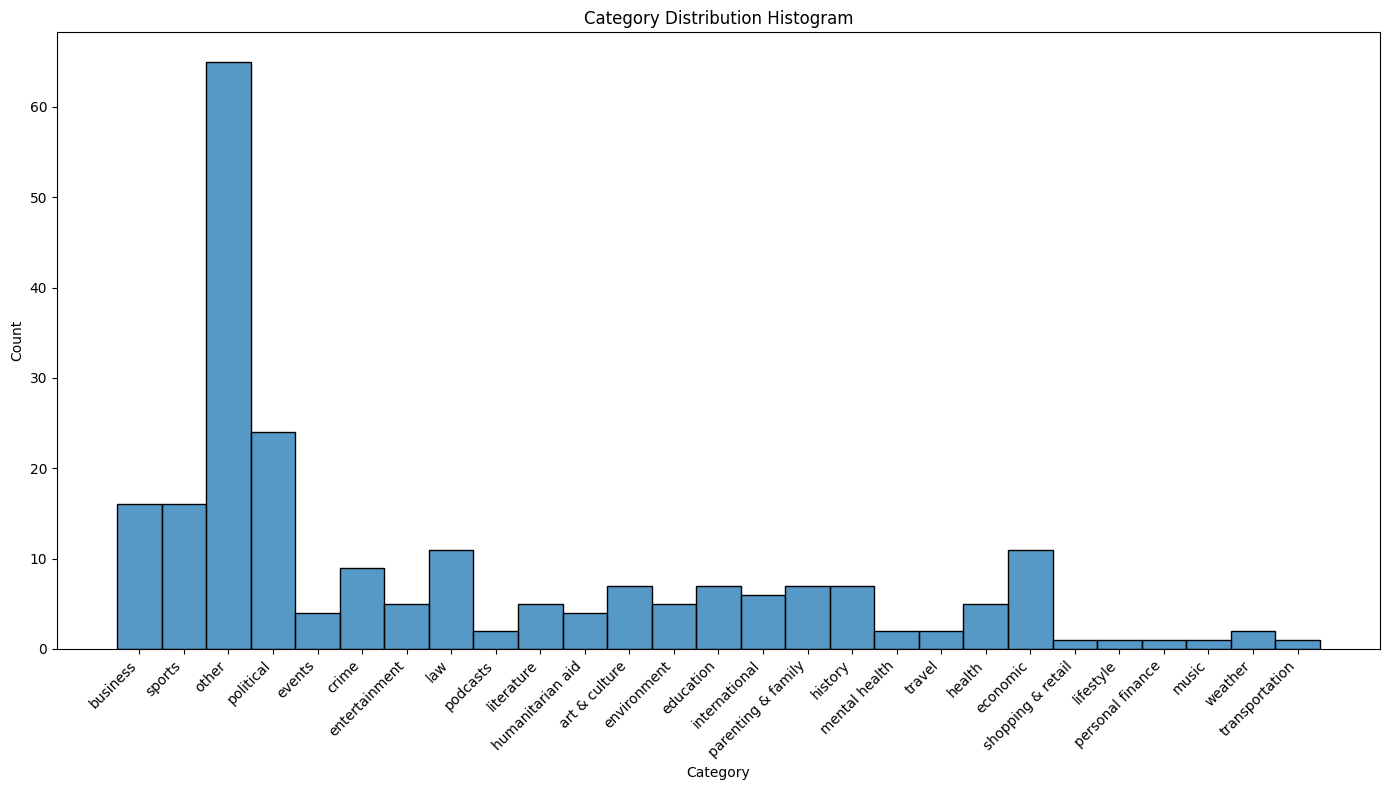

In [ ]:
# Visualize Category Distribution (Histogram)
plt.figure(figsize=(14, 8))  # Increased figure width for more space
sns.histplot(data['Category'], kde=False, bins=len(data['Category'].unique()), palette="viridis")
plt.title("Category Distribution Histogram")
plt.xlabel("Category")
plt.ylabel("Count")

# Adjust the x-tick labels for better readability
plt.xticks(rotation=45, ha='right')  # Rotate the labels to make them readable

# Adjust layout to ensure everything fits
plt.tight_layout()

plt.show()


In [ ]:
# 1. Inspect the Data
print("Data Overview:")
data.head(5)

Data Overview:


,Title,Summary,Link,Category
0,Musk’s AI startup raises further $6bn,Company now one of world’s most valuable start...,https://www.dawn.com/news/1880792/musks-ai-sta...,business
1,ICC announces official fixtures for Champions ...,Pak-India clash set for Feb 23; Pakistan to ta...,https://www.dawn.com/news/1880793/icc-announce...,sports
2,PTA announces ‘significant strides in enhancin...,Says first phase of cable installation commenc...,https://www.dawn.com/news/1880781/pta-announce...,other
3,The real-life violence that inspired South Kor...,Director and writer Hwang Dong-hyuk said the m...,https://images.dawn.com/news/1193085/the-real-...,political
4,"Shares at PSX shed nearly 1,500 points as mark...","Index declines by 1.33pc to close at 112,414.8...",https://www.dawn.com/news/1880788/shares-at-ps...,business


In [ ]:
print("Data Info:")
data.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     227 non-null    object
 1   Summary   206 non-null    object
 2   Link      227 non-null    object
 3   Category  227 non-null    object
dtypes: object(4)
memory usage: 7.2+ KB


In [ ]:
count=data.isnull().sum().sort_values(ascending=False)
percentage=((data.isnull().sum()/len(data)*100)).sort_values(ascending=False)
missing_data=pd.concat([count,percentage],axis=1,keys=['Count','Percentage'])
print("Count and Percentage of missing values for the columns: ")
missing_data

Count and Percentage of missing values for the columns: 


,Count,Percentage
Summary,21,9.251101
Title,0,0.000000
Link,0,0.000000
Category,0,0.000000


In [ ]:
# Fill missing values with "missing" for 'Title' and 'Summary' columns
data['Title'] = data['Title'].fillna("missing")
data['Summary'] = data['Summary'].fillna("missing")

# Check for missing values after filling
print(data.isnull().sum())

Title       0
Summary     0
Link        0
Category    0
dtype: int64


In [ ]:
data.drop(columns=['Title','Link'],inplace=True)
data.head()

,Summary,Category
0,Company now one of world’s most valuable start...,business
1,Pak-India clash set for Feb 23; Pakistan to ta...,sports
2,Says first phase of cable installation commenc...,other
3,Director and writer Hwang Dong-hyuk said the m...,political
4,"Index declines by 1.33pc to close at 112,414.8...",business


In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels
data['Category'] = label_encoder.fit_transform(data['Category'])

# To see the mapping
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

{'art & culture': 0, 'business': 1, 'crime': 2, 'economic': 3, 'education': 4, 'entertainment': 5, 'environment': 6, 'events': 7, 'health': 8, 'history': 9, 'humanitarian aid': 10, 'international': 11, 'law': 12, 'lifestyle': 13, 'literature': 14, 'mental health': 15, 'music': 16, 'other': 17, 'parenting & family': 18, 'personal finance': 19, 'podcasts': 20, 'political': 21, 'shopping & retail': 22, 'sports': 23, 'transportation': 24, 'travel': 25, 'weather': 26}


In [ ]:
labels=data.Category
labels.head()

,Category
0,1
1,23
2,17
3,21
4,1


In [ ]:
def clean_input(text, remove_stop_words=True, lemmatize_words=False):
    stop_words = set(stopwords.words('english'))  # Load NLTK stopwords
    text = text.lower()
    text = re.sub(r"http\S+", "link", text)
    text = re.sub(r"[^A-Za-z0-9\s]", "", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\bI\b", "I am", text)
    text = re.sub(r"\bur\b", "your", text)
    text = re.sub(r"\band\b", " and ", text)
    text = re.sub(r"\bd\b", " would", text)
    text = re.sub(r"\b11\b", "will", text)
    text = re.sub(r"\bc\b", "can", text)
    text = re.sub(r"\breg\b", "eg", text)
    text = re.sub(r"\btkts\b", "tickets", text)
    text = re.sub(r"\bru\b", "you", text)
    text = "".join([c for c in text if c not in punctuation])
    words = text.split()
    if remove_stop_words:
        words = [w for w in words if w not in stop_words]
    cleaned_text = " ".join(words)
    return cleaned_text

In [ ]:
cleaned1=lambda x: clean_input(x)
data['New Data'] = pd.DataFrame(data.Summary.apply(cleaned1))
data.head(10)


,Summary,Category,New Data
0,Company now one of world’s most valuable start...,1,company one worlds valuable startups estimated...
1,Pak-India clash set for Feb 23; Pakistan to ta...,23,pakindia clash set feb 23 pakistan take new ze...
2,Says first phase of cable installation commenc...,17,says first phase cable installation commenced ...
3,Director and writer Hwang Dong-hyuk said the m...,21,director writer hwang donghyuk said main chara...
4,"Index declines by 1.33pc to close at 112,414.8...",1,index declines 133pc close 11241480 expert say...
5,5 employees taken to hospital with injuries; i...,21,5 employees taken hospital injuries interior m...
6,The new case was detected in Balochistan's Qil...,7,new case detected balochistans qila abdullah m...
7,"The first Test will be played from Jan 17-21, ...",17,first test played jan 1721 second test held ja...
8,"Police urge residents to evacuate, lock doors ...",2,police urge residents evacuate lock doors 3foo...
9,Says country has no intention of using nuclear...,17,says country intention using nuclear programme...


In [ ]:
new_train=data['New Data'].copy()
new_train.head()

,New Data
0,company one worlds valuable startups estimated...
1,pakindia clash set feb 23 pakistan take new ze...
2,says first phase cable installation commenced ...
3,director writer hwang donghyuk said main chara...
4,index declines 133pc close 11241480 expert say...


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(new_train,labels, test_size=0.3, random_state=10)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

tfidf_train = tfidf_vectorizer.fit_transform(x_train)

tfidf_val = tfidf_vectorizer.transform(x_test)


In [ ]:
LogReg = LogisticRegression(max_iter=100)

LogReg.fit(tfidf_train, y_train)

Pred_LogReg = LogReg.predict(tfidf_val)

Accuracy_LogReg = metrics.accuracy_score(y_test, Pred_LogReg)

Accuracy_LogReg = round(Accuracy_LogReg * 100, 2)
print(f'Accuracy of Logistic Regression Model is: {Accuracy_LogReg}%')

Accuracy of Logistic Regression Model is: 40.58%


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(tfidf_train, y_train)
Pred_DT = dt_classifier.predict(tfidf_val)
Accuracy_DT = metrics.accuracy_score(y_test, Pred_DT)
Accuracy_DT = round(Accuracy_DT * 100, 2)
print(f'Accuracy of Decision Tree Model is: {Accuracy_DT}%')

Accuracy of Decision Tree Model is: 57.97%


In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(tfidf_train, y_train)
Pred_RF = rf_classifier.predict(tfidf_val)
Accuracy_RF = metrics.accuracy_score(y_test, Pred_RF)

Accuracy_RF = round(Accuracy_RF * 100, 2)
print(f'Accuracy of Random Forest Model is: {Accuracy_RF}%')

Accuracy of Random Forest Model is: 63.77%


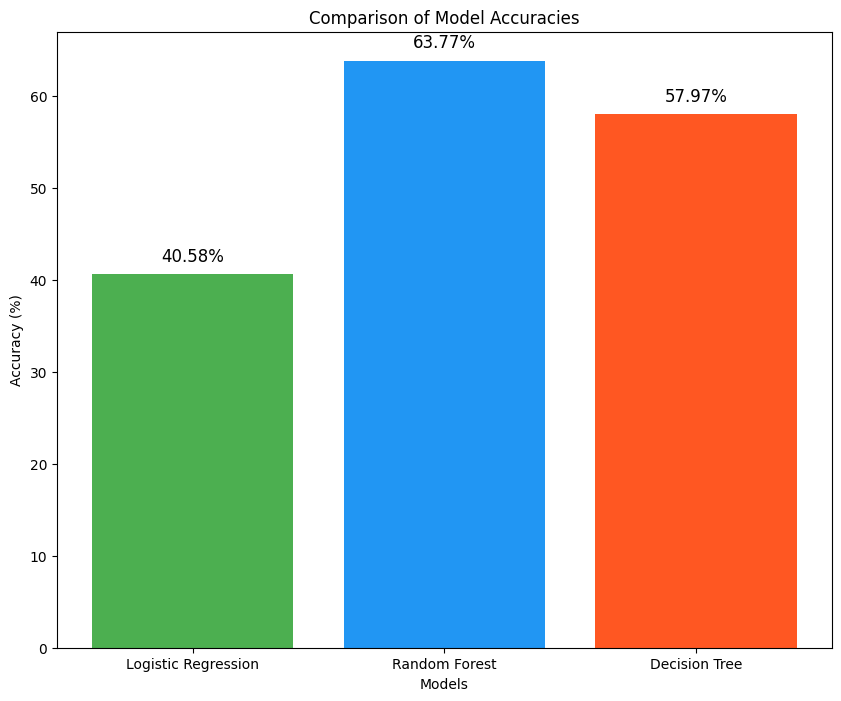

In [ ]:
import matplotlib.pyplot as plt

# Models and accuracies for comparison (3 models)
models = ['Logistic Regression', 'Random Forest', 'Decision Tree']
accuracies = [Accuracy_LogReg, Accuracy_RF, Accuracy_DT]  # Replace with actual accuracy values

# Create bar plot
plt.figure(figsize=(10, 8))
bars = plt.bar(models, accuracies, color=['#4CAF50', '#2196F3', '#FF5722'])  # Custom colors for better contrast

# Labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Model Accuracies')

# Add accuracy labels on top of bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height}%', ha='center', va='bottom', fontsize=12)

# Display plot
plt.show()


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Define the three models for the voting classifier
voting_clf = VotingClassifier(estimators=[
    ('Logistic Regression', LogReg),
    ('Random Forest', rf_classifier),
    ('Decision Tree', dt_classifier)
], voting='soft')

# Fit the voting classifier on the training data
voting_clf.fit(tfidf_train, y_train)

# Predict using the trained voting classifier
Pred_Voting = voting_clf.predict(tfidf_val)

# Calculate the accuracy of the voting classifier
Accuracy_Voting = accuracy_score(y_test, Pred_Voting)
Accuracy_Voting = round(Accuracy_Voting * 100, 2)

# Print the accuracy of the voting classifier
print(f'Accuracy of Voting Classifier is: {Accuracy_Voting}%')


Accuracy of Voting Classifier is: 57.97%


In [ ]:
import joblib

# Save the models
joblib.dump(LogReg, 'logreg_model.pkl')
joblib.dump(rf_classifier, 'rf_model.pkl')
joblib.dump(dt_classifier, 'dt_model.pkl')
joblib.dump(voting_clf, 'voting_model.pkl')

# Load the models for later use
logreg_model = joblib.load('logreg_model.pkl')
rf_model = joblib.load('rf_model.pkl')
dt_model = joblib.load('dt_model.pkl')
voting_model = joblib.load('voting_model.pkl')

# Example of predicting on new data
new_data = ["Breaking news on the stock market crash"]  # Example new text
new_data_tfidf = tfidf_vectorizer.transform(new_data)
prediction = voting_model.predict(new_data_tfidf)
predicted_category = label_encoder.inverse_transform(prediction)

print("Predicted Category:", predicted_category[0])


Predicted Category: business
